# Machine Learning on Ransomware

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Ransomware-24.csv", low_memory=False)

In [4]:
df.shape

(138047, 57)

In [5]:
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,Label
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.00000,216,18032,0,16,Benign
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.00000,518,1156,72,18,Benign
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.27273,104,270376,72,18,Benign
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.00000,90,4264,72,18,Benign
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.50000,849,1300,72,18,Benign


In [6]:
def visual(inp):
    display(inp)

visual(df.describe())

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.776813e+04,...,23.674263,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527653e+06,...,252.093958,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,0.000000,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,0.000000,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,0.000000,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,16596.000000,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000


In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  str    
 1   md5                          138047 non-null  str    
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13  ImageBase 

In [8]:
# convert pandas dataframe to numpy array
data=df.to_numpy()
data.shape

(138047, 57)

In [9]:
# split data sample and features value
n_samples, n_features= data.shape

# decreament features by one because of the first feature
n_features=n_features-1

# split data to X and last feature which is 'Label' to y
X=data[:,2:n_features]
y=data[:,n_features]

print(X.shape)
print(y.shape)

(138047, 54)
(138047,)


In [10]:
# create 10 folds for cross validation
folds=StratifiedKFold(n_splits=10)
folds

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

### Training (80%) & Testing (20%)

In [11]:
# split data to train and test parts
x_train, x_test, y_train, y_test=train_test_split(X,y,train_size=0.8)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Logistic Regression

Accuracy_score: 97.92%
Precision_score: 98.41%
Recall_score: 98.65%
F1_score: 98.53%


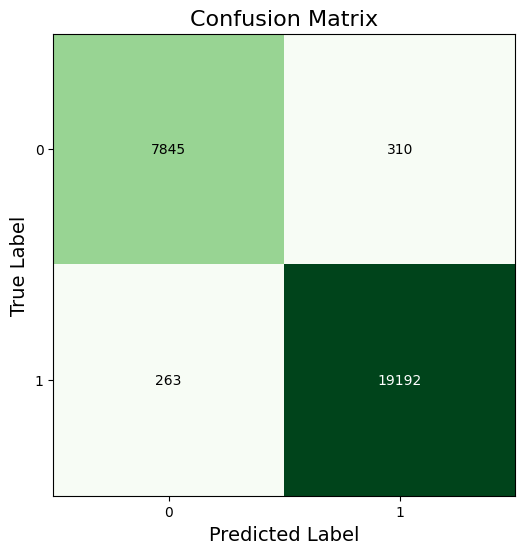

In [12]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)
# Cross-validated predictions
y_pred = cross_val_predict(model, x_train, y_train, cv=folds)
# Train the model
model.fit(x_train, y_train)
# Test on unseen data
y_test_pred = model.predict(x_test)

# Metrics
print(f"Accuracy_score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
print(f"Precision_score: {precision_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")
print(f"Recall_score: {recall_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")
print(f"F1_score: {f1_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")

# Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

AUC: 0.9949588518899672


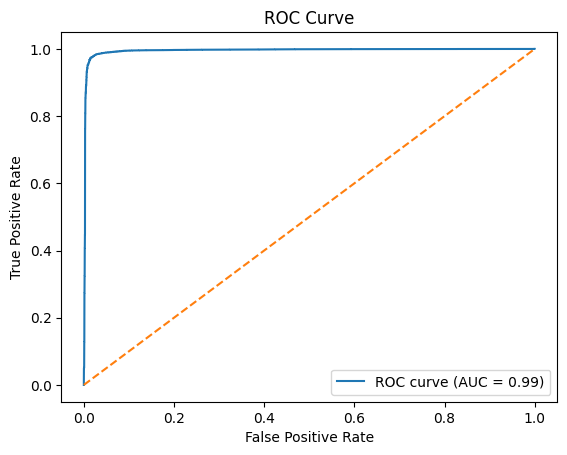

In [13]:
# probability of positive class
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Malware')
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Random Forest

Accuracy_score: 99.41%
Precision_score: 99.66%
Recall_score: 99.50%
F1_score: 99.58%


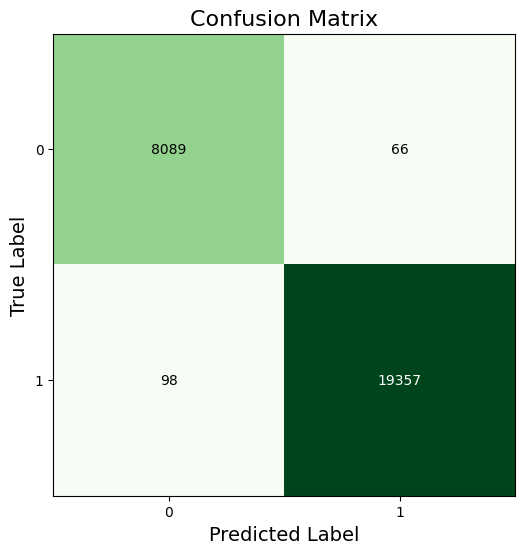

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=50)
# Cross-validated predictions
y_pred = cross_val_predict(model, x_train, y_train, cv=folds)
# Train the model
model.fit(x_train, y_train)
# Test on unseen data
y_test_pred = model.predict(x_test)

# Metrics
print(f"Accuracy_score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
print(f"Precision_score: {precision_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")
print(f"Recall_score: {recall_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")
print(f"F1_score: {f1_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")

# Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## Decision Tree

Accuracy_score: 98.48%
Precision_score: 98.83%
Recall_score: 99.02%
F1_score: 98.92%


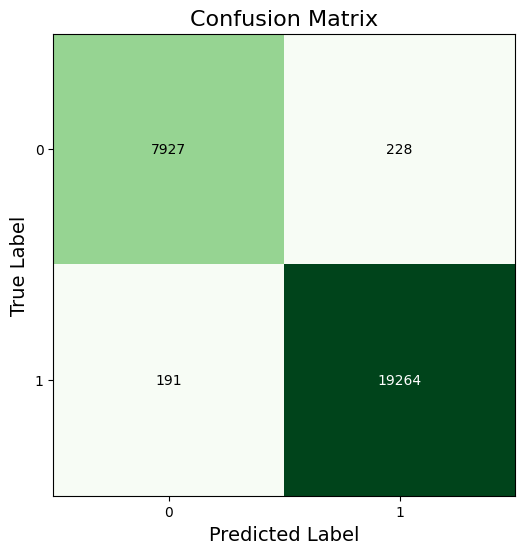

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
model = DecisionTreeClassifier(criterion="gini", max_depth=3)
# Cross-validated predictions
y_pred = cross_val_predict(model, x_train, y_train, cv=folds)
# Train the model
model.fit(x_train, y_train)
# Test on unseen data
y_test_pred = model.predict(x_test)

# Metrics
print(f"Accuracy_score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
print(f"Precision_score: {precision_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")
print(f"Recall_score: {recall_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")
print(f"F1_score: {f1_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")

# Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## K-NN

Accuracy_score: 98.42%
Precision_score: 99.09%
Recall_score: 98.66%
F1_score: 98.87%


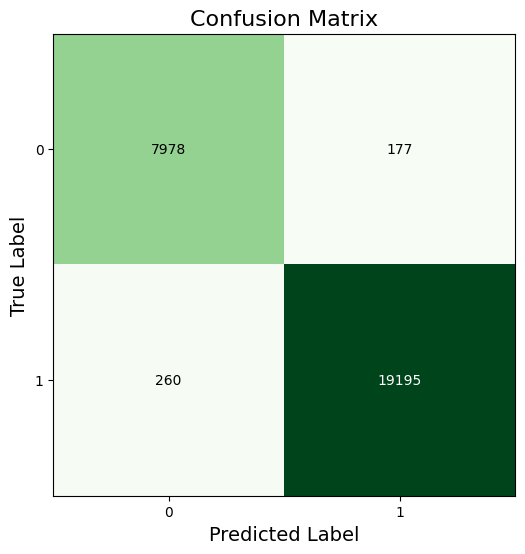

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-NN model
model = KNeighborsClassifier(n_neighbors=100, metric='euclidean')
# Cross-validated predictions
y_pred = cross_val_predict(model, x_train, y_train, cv=folds)
# Train the model
model.fit(x_train, y_train)
# Test on unseen data
y_test_pred = model.predict(x_test)

# Metrics
print(f"Accuracy_score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
print(f"Precision_score: {precision_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")
print(f"Recall_score: {recall_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")
print(f"F1_score: {f1_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")

# Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## SVM

Accuracy_score: 97.86%
Precision_score: 98.39%
Recall_score: 98.57%
F1_score: 98.48%


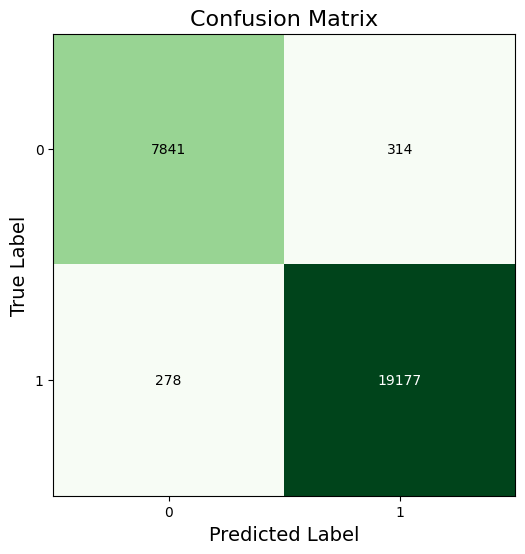

In [17]:
from sklearn.svm import LinearSVC

# Create a Logistic Regression model
model = LinearSVC(C=1.0, max_iter=100000)
# Cross-validated predictions
y_pred = cross_val_predict(model, x_train, y_train, cv=folds)
# Train the model
model.fit(x_train, y_train)
# Test on unseen data
y_test_pred = model.predict(x_test)

# Metrics
print(f"Accuracy_score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
print(f"Precision_score: {precision_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")
print(f"Recall_score: {recall_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")
print(f"F1_score: {f1_score(y_test, y_test_pred, pos_label='Malware') * 100:.2f}%")

# Confusion Matrix
matrix = confusion_matrix(y_test, y_test_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

## XGBoost

Accuracy_score: 99.58%
Precision_score: 99.76%
Recall_score: 99.64%
F1_score: 99.70%


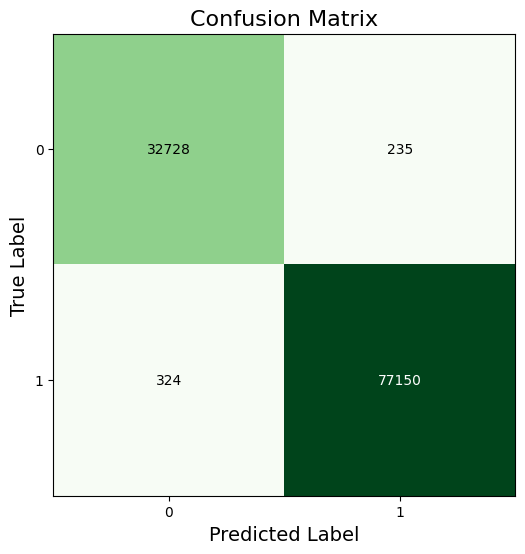

In [19]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode Class Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# split data to train and test parts as Encoded
x_tra, x_tes, y_tra, y_tes = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create an XGBoost model
model = XGBClassifier(
    tree_method="hist",
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    n_jobs=-1
)
# Cross-validated predictions
y_pred = cross_val_predict(model, x_tra, y_tra, cv=folds)
# Train the model
model.fit(x_tra, y_tra)
# Test on unseen data
y_test_pred = model.predict(x_tes)

# Metrics
print(f"Accuracy_score: {accuracy_score(y_tes, y_test_pred) * 100:.2f}%")
print(f"Precision_score: {precision_score(y_tes, y_test_pred) * 100:.2f}%")
print(f"Recall_score: {recall_score(y_tes, y_test_pred) * 100:.2f}%")
print(f"F1_score: {f1_score(y_tes, y_test_pred) * 100:.2f}%")

# Confusion Matrix
matrix = confusion_matrix(y_tra, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()